# <center>Computational Systems Biology, Homework 4
<center>王宇哲 2201112023
<center>Academy for Advanced Interdisciplinary Studies, Peking University

## 1. Waiting times for chemical reations

In the previous assignment, we saw that for a chemical reaction occurring at rate $r$, the distribution of waiting times $\tau$ between reaction events is given by:
$$
p(\tau)d\tau = r e^{-r\tau}d\tau\tag{1}
$$

a. By integrating over time, verify that the distribution is normalized

***Proof.*** By integrating over time, we have
$$
\begin{aligned}
\int_{0}^{\infty}p(\tau)d\tau &= \int_{0}^{\infty}r e^{-r\tau}d\tau\\
&= -e^{-r\tau}\Big|_{0}^{\infty}\\
&=1
\end{aligned}\tag{2}
$$
hence the distribution is normalized.

b. Here we will see a method for obtaining a random variable from a given distribution, starting from a uniformly distributed random variable. Suppose $u$ is a random variable with some distribution $p(u)$, and $\theta(u)$ is a function of $u$. Then the probability that $\theta^*$ lies between $\theta(u)$ and $\theta(u+du)$ is the same as the probability that $u^*$ lies between $u$ and $du$. This gives us a recipe for calculating the distribution $p(\theta)$:
$$
p(\theta)d\theta = p(u)du\Rightarrow p(\theta) = p(u)\left|\frac{du}{d\theta}\right|\tag{3}
$$
Assuming $u$ is uniformly distributed between 0 and 1, show that the number
$$
\theta(u)=\frac{1}{r}\ln{\Big(\frac{1}{u}\Big)}\tag{4}
$$
is distributed precisely as required for the waiting times above.

***Proof.*** Since $u$ is uniformly distributed between 0 and 1, we have
$$
p(u) = 1\tag{5}
$$
from (4) we have
$$
u = e^{-r\theta}\tag{6}
$$
hence
$$
\frac{d\theta}{du} = -\frac{1}{r}\frac{1}{u} = -\frac{1}{r}e^{r\theta}\tag{7}
$$
hence
$$
p(\theta) = p(u)\left|\frac{du}{d\theta}\right| = re^{-r\theta}\tag{8}
$$
which is exactly the distribution of waiting times above.

## 2. Stochastic simulation of an auto-regulatory system

In this problem you will learn how to implement a stochastic simulation. You will also use the simulation to unveil the role of negative auto-regulation in reducing fluctuations.

a. Consider a simple differential equation that describes the rate of change of some molecule $x$:
$$
\frac{dx}{dt} = \beta - \alpha x\tag{9}
$$
What is the solution of the differential equation? Let's assume $\beta=6$, $\alpha=3$ and the initial condition $x(0)=x_0$.

***Proof.*** The solution of the differential equation is
$$
x(t) = \frac{\beta}{\alpha} + \Big(x_0-\frac{\beta}{\alpha}\Big)e^{-\alpha t}=2+(x_0-2)e^{-3t}\tag{10}
$$

b. Unfortunately, the solution of the differential equation is deterministic and fails when fluctuations become important. Specifically, when the system has reached the steady state, the deterministic solution says that $x$ will no longer change. But if $x$ were to describe a real mRNA, then $x$ should fluctuate about its mean value, since translation and degradation are stochastic processes. Consistency with reality requires a stochastic description that respects both the probabilistic nature of events and the discreteness of molecule numbers. From now on, $x$ will represent the molecule numbers instead of molecule concentration, and the reaction rates ($\beta$ and $\alpha x$) will be regarded as probabilities per unit time of an reaction taking place. $\beta$ will be the probability per unit time of the creation of a molecule $x$, and $\alpha x$ will be the probability per unit time of the degradation of a molecule $x$. So let's start by returning to the actual underlying reactions:
$$
\begin{aligned}
[DNA]&\xrightarrow{\beta}[DNA]+X\\
X&\xrightarrow{\alpha} \varnothing
\end{aligned}\tag{11}
$$

1\. Consider a system that has $x_0=3$ at time $t=0$. What is the probability that the system will transition to the state $x=2$ during the next transition? (i.e., what is the probability that degradation occurs before transcription?)

***Proof.*** For a chemical reaction occurring at rate $r$, the distribution of waiting times $\tau$ between successive reactions is given by (1), and the probability that a reaction does not occur for $t<\tau$ is given by
$$
Q(\tau)=e^{-r\tau}\tag{12}
$$
hence the probability that the system will transition to the state $x=2$ during the next transition is given by
$$
\begin{aligned}
\int_{0}^{\infty}p(\tau)Q(\tau)d\tau=\int_{0}^{\infty}\alpha x_0 e^{-\alpha x_0\tau}e^{-\beta\tau}d\tau=\frac{\alpha x_0}{\alpha x_0+\beta}=\frac{3}{5}
\end{aligned}\tag{13}
$$

2\. Which aspect of the stochastic process does the deterministic differential equation describe successfully?

***Proof.*** The deterministic differential equation describes the mean value of the stochastic process successfully.

c. Let's consider how to perform stochastic simulations of chemical reactions. A rather inefficient (and potentially inaccurate) method to perform the stochastic simulation is by determining what process takes place during infinitesimal time intervals $dt$. Say the system starts at the state $x_0=3$. The simulation examines what happens during the first "infinitesimal" time interval $dt=10^{-10}$. The probability of degradation is $p_{deg}=\alpha x\times 10^{-10}=9\times 10^{-10}$ while the probability of transcription is $p_{trans}=\beta\times 10^{-10}=6\times 10^{-10}$. A random number $m$ is drawn from a uniform distribution between $0$ and $1$. What happens next depends on the value of $m$ as follows:

1. If $m<p_{deg}\rightarrow$ one molecule of $x$ is degraded, reaction rates are updated and the simulation proceeds to the next time step.
2. If $p_{deg}<m<p_{deg}+p_{trans}\rightarrow$ one molecule of is transcribed, reaction rates are updated and the simulation proceeds to the next time step.
3. If $p_{deg}+p_{trans}<m\rightarrow$ nothing happens and the simulation proceeds to the next time step.

A better way to approach the simulation is using Gillespie's "first-reaction" method. This method is *much* more efficient and is analytically exact. The main idea is to determine which of the two competing processes (degradation or transcription) takes place first and at what time it occurs. Gillespie shows that you can do it in the following manner: for each process ($i$) generate a waiting time ($\tau_i$) from the probability distribution ($P_i(\tau_i)$) $P_i(\tau_i)=k_i\exp{(-k_i\tau_i)}$: The process that occurs first is the one with the shorter waiting time. The time at which it occurs is just the waiting time.

Sketch an algorithm for simulating stochastic reactions using Gillespie's method. In this case we are dealing with only one species, the output of a simulation run should be the number of molecule at different time points.

***Proof.*** The algorithm for simulating stochastic reactions using Gillespie's method is as follows:
1. Initialize the system with $x=x_0$, $t=0$.
2. Calculate the reaction rates $a_1=\alpha x$, $a_2=\beta$ and $a_0=a_1+a_2=\alpha x+\beta$.
3. Generate $r_1\sim U[0,1]$, $r_2\sim U[0,1]$.
4. Calculate the waiting times $\tau=-\frac{1}{a_0}\ln{r_1}$.
5. If $r_2< \frac{a_1}{a_0}$, $x=x-1$; else $x=x+1$.
6. Update $t=t+\tau$. If $t>t_{max}$, stop; else go to step 2.


d. ```COMPUTATION``` Now consider the following two systems:

System A: a system in which protein X is expressed constitutively. In a deterministic setting, the concentration of X would evolve according to
$$
\frac{dx}{dt} = A - \gamma x\tag{14}
$$

System B: a system in which protein X represses its own synthesis. In a deterministic setting, it would evolve according to
$$
\frac{dx}{dt} = B\frac{K}{K+x} - \gamma x\tag{15}
$$

<img src="2.png" alt="png" style="zoom:75%;" />

1\. Compute the fixed points of the deterministic systems and their stability.

***Proof.*** For system (A), the fixed point is given by
$$
x=\frac{A}{\gamma}\tag{16}
$$
which is a stable fixed point. For system (B), the fixed point is given by
$$
x=\frac{\sqrt{K^2+4BK/\gamma}-K}{2}\tag{17}
$$
which is also a stable fixed point.

2\. In the following, we will interpret the reaction rates as probabilities per unit time of an reaction taking place, as we discussed in b) . Based on the algorithm that you sketch in c), implement a discrete stochastic simulation for System A, for both $A=10$ and $A=100$. Without loss of generality, we set $\gamma=1$. We can also measure volume in units of cell size, thus concentrations are equivalent to molecule numbers.

i. Plot a time series of your simulation results. Compare it to the numerical solution of the corresponding differential equation.

***Proof.*** The numerical solution of the differential equation is 
$$
x(t) = \frac{A}{\gamma}+\Big(x_0-\frac{A}{\gamma}\Big)e^{-\gamma t}\tag{18}
$$
The python implementation of the Gillespie's method is as follows. We set $x_0=0$ without loss of generality.

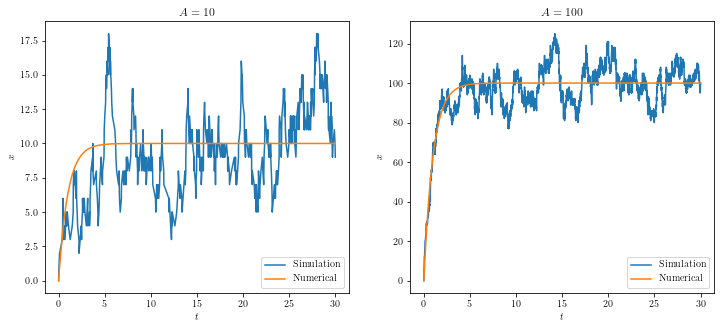

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def x_sol(t, A=10, gamma=1):
    """
    Numerical solution of the ODE
    """
    return A/gamma - (A/gamma)*np.exp(-gamma*t)


def Gillespie(A=10, t_0=0, x_0=0, gamma=1, t_max=30):
    """
    Implementation of Gillespie's method
    """
    t = t_0
    x = x_0
    t_list = [t_0]
    x_list = [x_0]

    while t <= t_max:
        a_1 = gamma * x
        a_2 = A
        a_0 = a_1 + a_2

        r_1, r_2 = np.random.random(2)
        tau = - np.log(r_1) / a_0
        t += tau

        if r_2 < a_1 / a_0:
            x -= 1
        else:
            x += 1
        
        x_list.append(x)
        t_list.append(t)

    return np.array(t_list), np.array(x_list)


fig, (ax1, ax2) = plt.subplots(1, 2)
plt.rcParams.update({
    "text.usetex": True
})
t_max = 30

for ax, A in zip([ax1, ax2], [10, 100]):
    t_list, x_list = Gillespie(A=A, t_max=t_max)
    ax.plot(t_list, x_list, label='$\\rm Simulation$')
    ax.plot(t_list, x_sol(t_list, A=A), label='$\\rm Numerical$')
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x$')
    ax.set_title(f'$A = {A}$')
    ax.legend()

fig.set_size_inches(12, 5)
plt.savefig('2-d-1.jpg', dpi=1000, bbox_inches='tight')
plt.show()

We can see that the simulation results are consistent with the numerical solution of the differential equation, though fluctuations are observed in the simulation results.

ii. Run the system for a long enough time so that it has reached a steady state. Plot a histogram of $x$. Verify that the variance and mean of the steady state distribution are consistent with Poisson statistics.

***Proof.*** The python implementation is as follows.

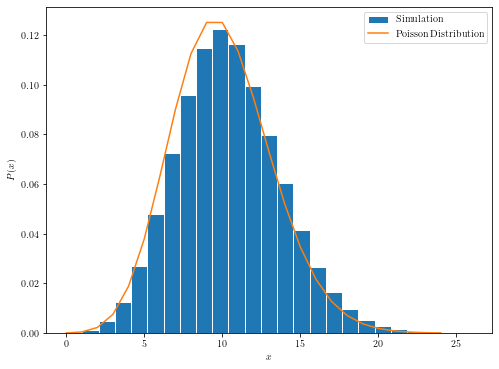

Mean: 10.51368109448756; Var: 10.29200286952364


In [38]:
from scipy.stats import poisson

_, x_list = Gillespie(A=10, t_max=1e4)
x_list = x_list[len(x_list)//4:]

fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
ax.hist(x_list, bins=25, density=True, edgecolor='white', label='$\\rm Simulation$')
ax.plot(np.arange(0, 25), poisson.pmf(np.arange(0, 25), mu=10), label='$\\rm Poisson\, Distribution$')
ax.set_xlabel('$x$')
ax.set_ylabel('$P(x)$')
ax.legend()

fig.set_size_inches(8, 6)
plt.savefig('2-d-2.jpg', dpi=1000, bbox_inches='tight')
plt.show()

print(f'Mean: {np.mean(x_list, axis=0)}; Var: {np.var(x_list, axis=0)}')

We can see that the variance and mean of the steady state distribution are consistent with Poisson statistics *i.e.* 
$$
E(x)=Var(x)=\frac{A}{\gamma}=10\tag{19}
$$

3\. For System B, set $K=100$ and choose B such that $\langle x\rangle =100$ is a steady state. Implement a discrete stochastic simulation to demonstrate that the variance of the auto-regulatory system is lower than that of the constitutive system given the same mean.

***Proof.*** We set $K=100$, $B=200$, $\gamma=1$ so that $\langle x\rangle =100$ is a steady state. The python implementation is as follows.

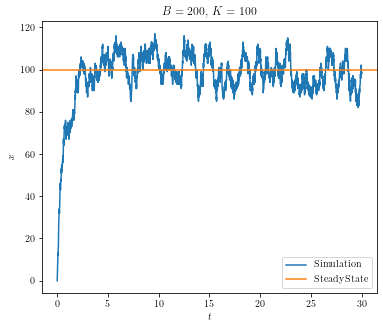

In [51]:
def Gillespie_B(K=100, B=200, t_0=0, x_0=0, gamma=1, t_max=30):
    """
    Implementation of Gillespie's method
    """
    t = t_0
    x = x_0
    t_list = [t_0]
    x_list = [x_0]

    while t <= t_max:
        a_1 = gamma * x
        a_2 = B * K / (K + x)
        a_0 = a_1 + a_2

        r_1, r_2 = np.random.random(2)
        tau = - np.log(r_1) / a_0
        t += tau

        if r_2 < a_1 / a_0:
            x -= 1
        else:
            x += 1
        
        x_list.append(x)
        t_list.append(t)

    return np.array(t_list), np.array(x_list)


fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True
})
t_max = 30

t_list, x_list = Gillespie_B(t_max=t_max)
ax.plot(t_list, x_list, label='$\\rm Simulation$')
ax.axhline(y=100,label='$\\rm Steady\,State$', color='tab:orange')
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_title('$B=200,\,K=100$')
ax.legend()

fig.set_size_inches(6, 5)
plt.savefig('2-d-3.jpg', dpi=1000, bbox_inches='tight')
plt.show()

We can see that the variance of the auto-regulatory system (B) is decreased compared to system (A), suggesting that the auto-regulatory system is more stable.

## 3. Deterministic and stochastic descriptions of a system with nonlinear degradation

Let's consider a fixed volume system in which a protein X, which is constitutively expressed at a rate $k$, acts as its own degradation enzyme, i.e. once there are enough proteins around, the following irreversible reaction $X+X\rightarrow X$ can take place with a rate $\gamma$.

a. If there are $n$ proteins, in how many different ways can one enzymatic degradation occur?

***Proof.*** There are $C_n^2=\frac{n(n-1)}{2}$ ways can one enzymatic degradation occur.

b. Write the master equation for the process.

***Proof.*** The master equation for the process is
$$
\frac{dP_n}{dt} = -\Big(k+\gamma\frac{n(n-1)}{2}\Big)P_n+kP_{n-1}+\gamma\frac{n(n+1)}{2}P_{n+1}\tag{20}
$$

c. Write an equation for $\frac{d\langle n \rangle}{dt}$ in terms of the mean $\langle n\rangle$ and the variance $V=\langle n^2 \rangle-\langle n \rangle^2$. Note that in this case the variance will not go away as it did in the cases shown in class where reaction terms were linear.

***Proof.*** Consider that
$$
\langle n \rangle = \sum_{n=0}^{\infty}nP_n\tag{21}
$$
we have
$$
\begin{aligned}
\frac{d\langle n \rangle}{dt}&=\sum_{n=0}^{\infty}n\frac{dP_n}{dt}\\
&=-\sum_{n=0}^{\infty}n\Big(\Big(k+\gamma\frac{n(n-1)}{2}\Big)P_n-kP_{n-1}-\gamma\frac{n(n+1)}{2}P_{n+1}\Big)\\
&=-k\sum_{n=0}^{\infty}nP_n-\frac{\gamma}{2}\sum_{n=0}^{\infty}n^2(n-1)P_{n}+k\sum_{n=0}^{\infty}nP_{n-1}+\frac{\gamma}{2}\sum_{n=0}^{\infty}n^2(n+1)P_{n+1}\\
&=k-\frac{\gamma}{2}\sum_{n=0}^{\infty}n(n-1)P_n\\
&=k-\frac{\gamma}{2}\Big(V+\langle n \rangle^2-\langle n \rangle\Big)
\end{aligned}\tag{22}
$$

d. Write the differential equation for the corresponding deterministic system.

***Proof.*** With $V=0$, the differential equation for the corresponding deterministic system is
$$
\frac{dX}{dt}=k-\frac{\gamma}{2}\Big(X^2-X\Big)\tag{23}
$$

e. Assuming that the variance of the steady state distribution is known, what conditions on the variance will ensure that the steady state mean is similar to the prediction of the deterministic system?

***Proof.*** The steady state of the deterministic system is given by
$$
X = \frac{1+\sqrt{1+8k/\gamma}}{2}\tag{24}
$$
The steady state mean of the stochastic system is given by
$$
\langle n \rangle = \frac{1+\sqrt{1+8k/\gamma-4V}}{2}\tag{25}
$$
hence to ensure that the steady state mean is similar to the prediction of the deterministic system, we need
$$
V\ll \max\Big(\frac{1}{4},\frac{2k}{\gamma}\Big)\tag{26}
$$